In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
import pandas as pd
doc=pd.read_csv('/content/drive/MyDrive/heart_2020_cleaned.csv')
doc.head()
df=doc
df

,HeartDisease,BMI,Smoking,AlcoholDrinking,Stroke,PhysicalHealth,MentalHealth,DiffWalking,Sex,AgeCategory,Race,Diabetic,PhysicalActivity,GenHealth,SleepTime,Asthma,KidneyDisease,SkinCancer
0,No,16.60,Yes,No,No,3.0,30.0,No,Female,55-59,White,Yes,Yes,Very good,5.0,Yes,No,Yes
1,No,20.34,No,No,Yes,0.0,0.0,No,Female,80 or older,White,No,Yes,Very good,7.0,No,No,No
2,No,26.58,Yes,No,No,20.0,30.0,No,Male,65-69,White,Yes,Yes,Fair,8.0,Yes,No,No
3,No,24.21,No,No,No,0.0,0.0,No,Female,75-79,White,No,No,Good,6.0,No,No,Yes
4,No,23.71,No,No,No,28.0,0.0,Yes,Female,40-44,White,No,Yes,Very good,8.0,No,No,No
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
319790,Yes,27.41,Yes,No,No,7.0,0.0,Yes,Male,60-64,Hispanic,Yes,No,Fair,6.0,Yes,No,No
319791,No,29.84,Yes,No,No,0.0,0.0,No,Male,35-39,Hispanic,No,Yes,Very good,5.0,Yes,No,No
319792,No,24.24,No,No,No,0.0,0.0,No,Female,45-49,Hispanic,No,Yes,Good,6.0,No,No,No
319793,No,32.81,No,No,No,0.0,0.0,No,Female,25-29,Hispanic,No,No,Good,12.0,No,No,No


In [ ]:
df.describe()

,BMI,PhysicalHealth,MentalHealth,SleepTime
count,319795.000000,319795.00000,319795.000000,319795.000000
mean,28.325399,3.37171,3.898366,7.097075
std,6.356100,7.95085,7.955235,1.436007
min,12.020000,0.00000,0.000000,1.000000
25%,24.030000,0.00000,0.000000,6.000000
50%,27.340000,0.00000,0.000000,7.000000
75%,31.420000,2.00000,3.000000,8.000000
max,94.850000,30.00000,30.000000,24.000000


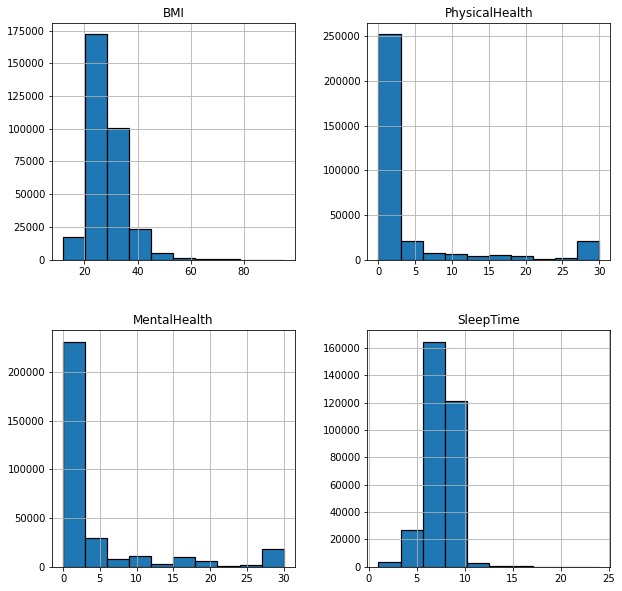

In [ ]:

import matplotlib.pyplot as plt
doc.hist(edgecolor="black", linewidth=1.2, figsize=(10, 10))
plt.show()

In [ ]:
df['HeartDisease'].replace({'No':0,'Yes':1}, inplace=True)

df['Smoking'].replace({'No':0,'Yes':1}, inplace=True)

df['AlcoholDrinking'].replace({'No':0,'Yes':1}, inplace=True)

df['Stroke'].replace({'No':0,'Yes':1}, inplace=True)

df['DiffWalking'].replace({'No':0,'Yes':1}, inplace=True)

df['Diabetic'].replace({'No':0,'No, borderline diabetes':0,'Yes (during pregnancy)':1,'Yes':1}, inplace=True)

df['PhysicalActivity'].replace({'No':0,'Yes':1}, inplace=True)

df['Asthma'].replace({'No':0,'Yes':1}, inplace=True)

df['KidneyDisease'].replace({'No':0,'Yes':1}, inplace=True)

df['SkinCancer'].replace({'No':0,'Yes':1}, inplace=True)

df['Sex'].replace({'Male':0,'Female':1}, inplace=True)
df['HeartDisease'].replace({'No':0, 'Yes' :1},inplace=True)
df['AgeCategory'].replace({'18-24':0,'25-29':1,'30-34':2,'35-39':3,'40-44':4,'45-49':5,'50-54':6,'55-59':7,'60-64':8,'65-69':9,'70-74':10,'75-79':11,'80 or older':12}, inplace=True)

df['Race'].replace({'White':0,'Hispanic':1,'Black':2,'Asian':3,'American Indian/Alaskan Native':4,'Other':5}, inplace=True)

df['GenHealth'].replace({'Excellent':0,'Very good':1,'Good':2,'Fair':3,'Poor':4}, inplace=True)

In [ ]:
X=['BMI',	'Smoking'	,'AlcoholDrinking'	,'Stroke'	,'PhysicalHealth',	'MentalHealth','DiffWalking',	'Sex',	'AgeCategory'	,'Race',	'Diabetic',	'PhysicalActivity',	'GenHealth'	,'SleepTime',	'Asthma',	'KidneyDisease',	'SkinCancer',]
Y=['HeartDisease']

In [ ]:
X=df[X]
Y=df[Y]
from sklearn.preprocessing import StandardScaler## nó đưa các giá trị đầu vào  thành các số từ 0-1 thay vi để các giá tri gốc lớn thì đưa về nhỏ  
scaler = StandardScaler().fit(X)
standardized_data = scaler.transform(X)
X = standardized_data# chuẩn hóa dữ liệu 

In [ ]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test=train_test_split(X, Y, test_size=0.3, random_state=1)

In [ ]:
from sklearn.tree import DecisionTreeClassifier
clf = DecisionTreeClassifier().fit(X_train,y_train)
y_pred = clf.predict(X_test)

In [ ]:
from sklearn import metrics
print("Accuracy:",metrics.accuracy_score(y_test, y_pred))

Accuracy: 0.8645285024859546


In [ ]:
from sklearn.linear_model import LinearRegression
model = LinearRegression().fit(X_train,y_train)
r_sq = model.score(X_train, y_train)
r_sq

0.1406434704644517

In [ ]:
df[0:4:2]

,HeartDisease,BMI,Smoking,AlcoholDrinking,Stroke,PhysicalHealth,MentalHealth,DiffWalking,Sex,AgeCategory,Race,Diabetic,PhysicalActivity,GenHealth,SleepTime,Asthma,KidneyDisease,SkinCancer
0,0,16.60,1,0,0,3.0,30.0,0,1,7,0,1,1,1,5.0,1,0,1
2,0,26.58,1,0,0,20.0,30.0,0,0,9,0,1,1,3,8.0,1,0,0
